# Basic Tutorial on MLSpear

<div style="text-align: justify">MLSpear is a python package that allows users to create fully connected neural networks. It does not depend on any deep learning frameworks such as TensorFlow, and PyTorch. Instead, it uses only numpy (for storing vectors and using vector operations), networkx (for drawing the neural network), and matplotlib.pyplot (for sketching error curves). To use the package, first import it and all necessary libraries.</div>

In [1]:
from MLSpear import *
import numpy as np
import matplotlib.pyplot as plt

## Neural Network

<div style="text-align: justify">Creating a neural network, is very simple to do. Simply call in the class Neural_Network with the first parameter a list of layers, and on the second parameter set the print_error either True or False. Additionally, you can draw the neural network architecture calling the draw_neural_network method.</div>

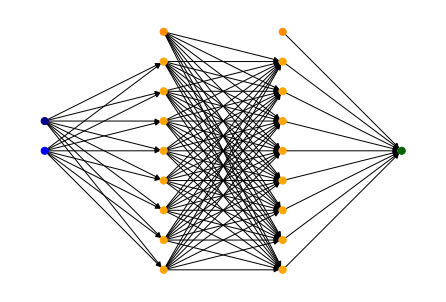

In [2]:
Model = Neural_Network([Tanh(2, 8), PReLU(8, 8), Softmax(8, 1)], print_error = True)
Model.draw_neural_network()

<div style="text-align: justify">Notice that each layer has two parameters. The first parameter represents the input dimension, while the second parameter represents the output dimension. When the neural network is drawn, the second layer represents the Tanh layer, the third layer represents the PreLu Layer, and the last layer represents the output layer, i.e the softmax layer (Note: Batch Normalization layer will not be shown in the draw_neural_network method). To train the model, first lets generate the donut dataset.</div>

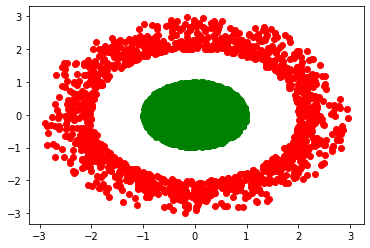

In [3]:
#Classification (Non Linear)
points = np.random.randn(10000, 2)
green  = [] 
red    = []

for point in points:
    x = point[0]
    y = point[1]
    
    r = np.sqrt(x ** 2 + y ** 2)
    if r < 1: green.append([x, y])
    if r > 2 and r < 3: red.append([x, y])
    
green = np.array(green)
red   = np.array(red)

plt.scatter(green[:,0], green[:,1], color = 'green')
plt.scatter(red[:, 0], red[:, 1], color = 'red')
plt.show()

X = np.vstack((green, red))
Y = np.zeros((X.shape[0], 1))
Y[0:green.shape[0], 0] = 1

To train the neural network, use the train method that takes in the following parameters.

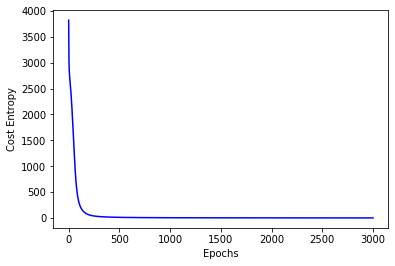

In [4]:
Model.train(X, Y, 3000, 0.0001, batch_size = X.shape[0])

<div style="text-align: justify">X represents a 2D numpy (n x d) array where each row represents an instance of a data set. Y represents the target set (n x 1 numpy array), 3000 represents the number of epochs, 0.0001 is the learning rate, and batch_size simply is the size of your training batch (Note: if batch_size = X.shape[0], that gives the vanilla gradient descent algorithm). Now, lets plot the boundary curve from our model. </div>

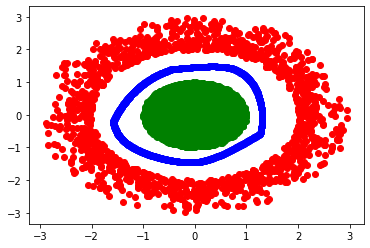

In [5]:
#Plot Decision boundary
boundary = []

for x in np.linspace(-3, 3, 1000):
    for y in np.linspace(-3, 3, 1000):
        
        point = np.array([x, y])
        prediction = Model.predict(point)
        
        if np.abs(prediction - 0.5) < 0.01:
            boundary.append([x, y])

boundary = np.array(boundary)
plt.scatter(boundary[:, 0], boundary[:, 1], color = 'blue')
plt.scatter(green[:, 0], green[:, 1], color = 'green')
plt.scatter(red[:, 0], red[:, 1], color = 'red')
plt.show()

The train method allows other parameters to be passed in. For example, you can set the optimizer (optimizer), mometum type (mtype), and the momentum parameter (mu).

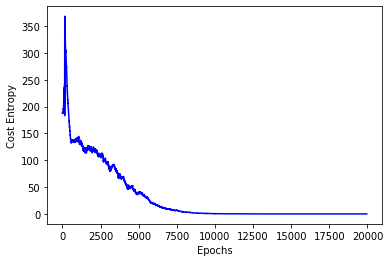

In [6]:
Model.train(X, Y, 4, 0.0001, batch_size = 300, mu = 0.000001, optimizer = 'rmsprop') 
# To add momentum, simply include the mtype parameter, set it to either 'nesterov' or 'conventional',
# and set mu to a number between 0 and 1.

Again, you can plot the decision boundary and you will get a similar result.

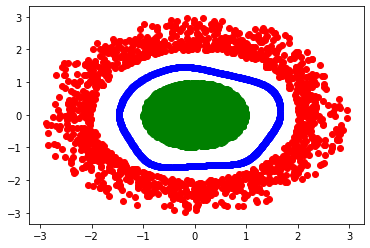

In [7]:
#Plot Decision boundary
boundary = []
for x in np.linspace(-3, 3, 1000):
    for y in np.linspace(-3, 3, 1000):
        
        point      = np.array([x, y])
        prediction = Model.predict(point)
        
        if np.abs(prediction - 0.5) < 0.01:
            boundary.append([x, y])

boundary = np.array(boundary)
plt.scatter(boundary[:, 0], boundary[:, 1], color = 'blue')
plt.scatter(green[:, 0], green[:, 1], color = 'green')
plt.scatter(red[:, 0], red[:, 1], color = 'red')
plt.show()

## Regression

This package allows users to create a linear regression, here is an example on how to do it. First let's us create two gaussian clouds.

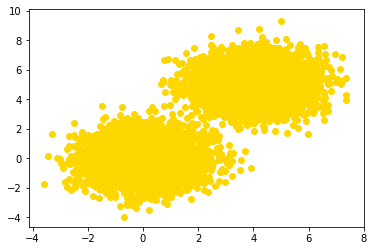

In [59]:
#Regression
yellow_1 = np.random.randn(5000, 2)
yellow_2 = np.random.randn(5000, 2) + np.array([4, 5])

plt.scatter(yellow_1[:, 0], yellow_1[:, 1], color = 'gold')
plt.scatter(yellow_2[:, 0], yellow_2[:, 1], color = 'gold')
plt.show()

data = np.vstack((yellow_1, yellow_2))
X = data[:,0].reshape((data[:,0].shape[0], 1))
Y = data[:,1].reshape((data[:,1].shape[0], 1))

Next, create a linear regression model by calling in the Neural Network class with one regression layer.

In [60]:
Model = Neural_Network([Regression(1, 1)], print_error = True)

Train the model using vanilla gradient descent with 200 epochs at learning rate 0.00001 (Note: you can use any gradient descent method).

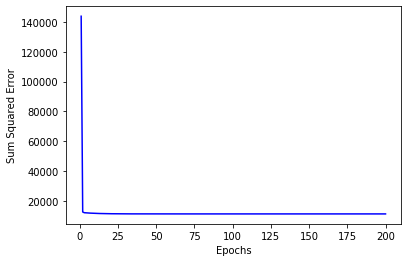

In [61]:
Model.train(X, Y, 200, 0.00001, batch_size = X.shape[0])

Finally, draw the line of best fit to the dataset.

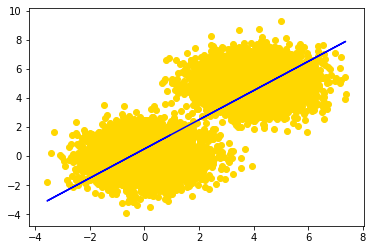

In [62]:
Y_hat = Model.predict(X)
plt.plot(X, Y_hat, color = 'blue')
plt.scatter(yellow_1[:, 0], yellow_1[:, 1], color = 'gold')
plt.scatter(yellow_2[:, 0], yellow_2[:, 1], color = 'gold')
plt.show()

## Logistic Regression

We can create a logistic regression model that seperates the two datasets. To do that, let's first create the same data set but allow different colors in different gaussian clouds.

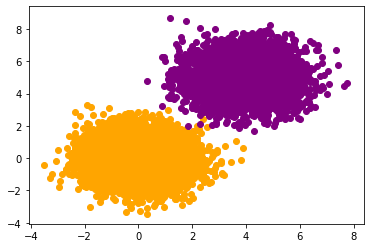

In [67]:
# Logistic Regression
orange = np.random.randn(5000, 2)
purple = np.random.randn(5000, 2) + np.array([4, 5])

plt.scatter(orange[:, 0], orange[:, 1], color = 'orange')
plt.scatter(purple[:, 0], purple[:, 1], color = 'purple')
plt.show()

X = np.vstack((orange, purple))
Y = np.zeros((X.shape[0], 1))
Y[0:orange.shape[0], 0] = 1

Create a logistic regression model by calling in Neural Network with one softmax layer.

In [68]:
Model = Neural_Network([Softmax(2, 1)], print_error = True)

Train the model using batch gradient descent (or any gradient descent methods).

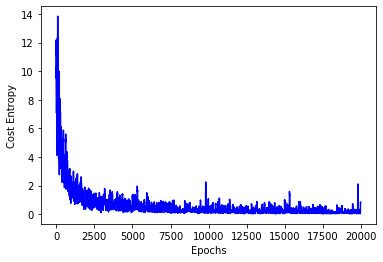

In [69]:
Model.train(X, Y, 2, 0.001)

Finally, plot the decision boundary for the two gaussian clouds.

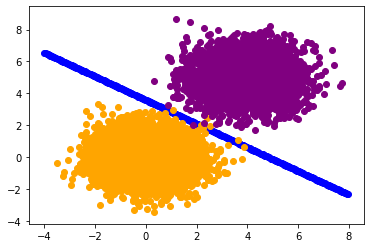

In [70]:
#Plot Decision boundary
boundary = []

for x in np.linspace(-4, 8, 1000):
    for y in np.linspace(-4, 8, 1000):
        
        point      = np.array([x, y])
        prediction = Model.predict(point)
        
        if np.abs(prediction - 0.5) < 0.001:
            boundary.append([x, y])

boundary = np.array(boundary)
plt.scatter(boundary[:, 0], boundary[:, 1], color = 'blue')
plt.scatter(orange[:, 0], orange[:, 1], color = 'orange')
plt.scatter(purple[:, 0], purple[:, 1], color = 'purple')
plt.show()